# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')
sns.set()

In [2]:
df.info()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


temperature    0
gender         0
heart_rate     0
dtype: int64

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


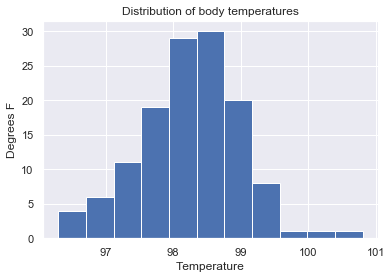

In [5]:
# Calculate the appropriate bin size (square root of # of samples)
bin_size = int(np.sqrt(len(df.temperature)))

# Plot the body temperatures
plt.hist(df.temperature, bins=bin_size)
plt.xlabel('Temperature');
plt.ylabel('Degrees F');
plt.title('Distribution of body temperatures')
plt.show()

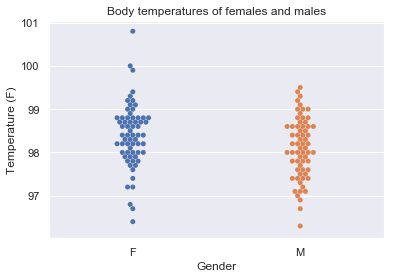

In [6]:
# Plot swarmplot of temperatures for F and M genders
sns.swarmplot(x='gender', y='temperature', data=df);
plt.xlabel('Gender');
plt.ylabel('Temperature (F)');
plt.title('Body temperatures of females and males');
plt.show()

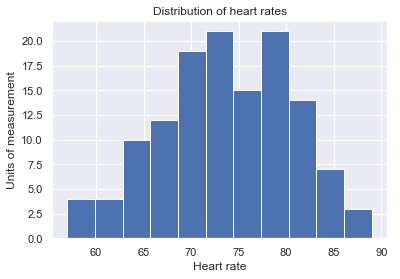

In [7]:
# Plot distribution of heart rates
plt.hist(df.heart_rate, bins=int(np.sqrt(len(df.heart_rate))));
plt.xlabel('Heart rate');
plt.ylabel('Units of measurement');
plt.title('Distribution of heart rates')
plt.show()

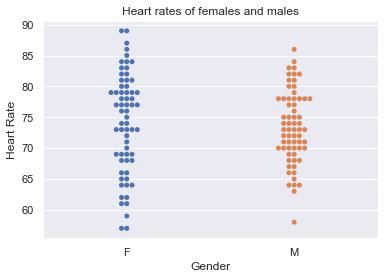

In [8]:
# Plot swarmplot of heart rates for F and M genders
sns.swarmplot(x='gender', y='heart_rate', data=df);
plt.xlabel('Gender');
plt.ylabel('Heart Rate');
plt.title('Heart rates of females and males');
plt.show()

# 1) Is the distribution of body temperatures normal?

In [9]:
# The following function takes a 1D array of data 
# as input and returns the x and y values of the ECDF.

def ecdf(data):
    """ Compute Empirical Cumulative Distribution
    for a one-dimensional array of measurements.
    """
    # Number of data points
    n = len(data)
    
    # x-data for the ECDF
    x = np.sort(data)
    
    # y-data for the ECDF
    y = np.arange(1, n+1) / n
    
    return x, y

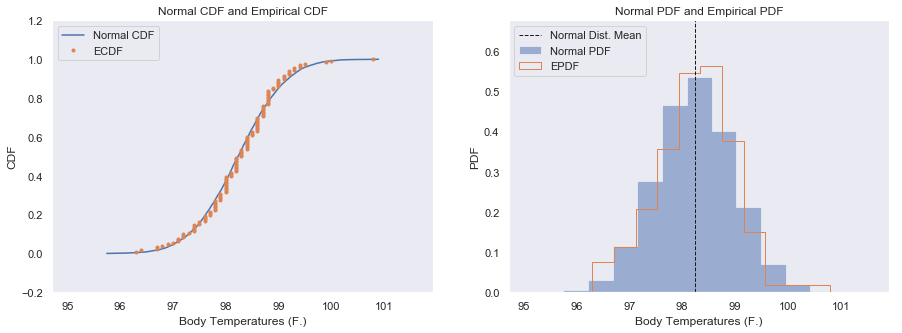

In [10]:
# Plot the CDFs
plt.figure(1, figsize=(15, 5))
plt.subplot(1, 2, 1)

# Compute mean and standard deviation
s_mean = np.mean(df.temperature)
s_sigma = np.std(df.temperature)

# Take 10k samples out of a normal distribution
samples_ndist = np.random.normal(s_mean, s_sigma, 10000)

# Get the CDF of the samples and of the data
x_sample, y_sample = ecdf(samples_ndist)
x_temp, y_temp = ecdf(df.temperature)

# Plot the normal CDF and the ECDF
plt.plot(x_sample, y_sample);
plt.plot(x_temp, y_temp, marker= '.', linestyle='none');

# Axis labels
plt.title('Normal CDF and Empirical CDF');
plt.xlabel('Body Temperatures (F.)');
plt.ylabel('CDF');

# Legend
plt.legend(('Normal CDF', 'ECDF'), loc='upper left');

# Margin padding
plt.margins(0.2);

# Disable gridlines
plt.grid(b=None)

# Plot the PDFs
plt.subplot(1, 2, 2)

# Calculate the appropriate bin size (square root of # of samples)
bin_size = int(np.sqrt(len(df.temperature)))

# Plot the normal and empirical PDFs
plt.hist(samples_ndist, bins=bin_size, density=True, histtype='stepfilled', alpha=0.5);
plt.hist(df.temperature, bins=bin_size, density=True, histtype='step');
plt.axvline(samples_ndist.mean(), color='k', linestyle='dashed', linewidth=1);

# Axis labels
plt.title('Normal PDF and Empirical PDF')
plt.xlabel('Body Temperatures (F.)');
plt.ylabel('PDF');

# Legend
plt.legend(('Normal Dist. Mean', 'Normal PDF', 'EPDF'), loc='upper left');

# Margin padding
plt.margins(0.2);

# Disable gridlines
plt.grid(b=None)

# Display plot
plt.show()

**Null hypothesis:** the distribution of the samples is equal to a normal distribution.
<br>**Alternative hypothesis:** the distribution of the sample is NOT equal to a normal distribution.
<br>**Significance level:** 5% (0.05)

In [11]:
# Perform normality tests using scipy.stats 

# Shapiro test
_, sh_pval = stats.shapiro(df.temperature)
print('Shapiro p-value: {0:.4f}'.format(sh_pval))

# Normal test
_, n_pval = stats.normaltest(df.temperature)
print('Normal test p-value: {0:.4f}'.format(n_pval))

Shapiro p-value: 0.2332
Normal test p-value: 0.2587


**The distribution of body temperatures is normal.**

We start off by drawing 10,000 random samples using the sample mean and sample standard deviation to compute a theoretical CDF. We then compare that CDF to the actual data (ECDF) we have in our environment. We can compare the theoretical and empirical CDFs, without any binning bias, to visualize their normality given how closely they overlap each other.
<br><br>A quick glance at the overlapping histograms in the figure above, to the right, allows us to visualize the normal distributions of the probability density functions (PDF). The empirical distribution of the body temperature data looks bell-shaped and resembles a normal distribution with its data symmetric about the mean. 
<br><br>If the distribution of body temperatures for all humans is normally distributed, then the sampling distribution is also normally distributed. In practice, however, we usually don't know if the parent population is normally distributed; therefore, according to the central limit theorem, given that our sample size (n = 130) is reasonably large and greater than (or equal to) 30 samples, we can assume that the sampling distribution is roughly normal. 
<br><br>After performing normality tests with the scipy.stats library, we fail to reject the null hypothesis since the p-values are greater than the preset 5% significance level.

# 2) Is the sample size large? Are the observations independent?

In [12]:
# The number of samples in our data set
len(df)

130

Yes, the sample size (n=130) can be considered large enough for statistical inference because it is greater than the 30 sample theshold (n >= 30). Yes, the samples can be considered as independent observations without replacement because the sample size well below 10% of the population being considered (all humans).

# 3) Is the true population mean really 98.6 degrees F?

* First, try a bootstrap hypothesis test.
* Now let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use a t or z-statistic?
* Now try using the other test. How would the result be different? Why?

Before making any further statistical inferences, let's verify that we met all 3 conditions for inference on the sample mean; otherwise, the calculations and conclusions that follow may be incorrect. We already established that our samples are normal and independent. For our final condition, we assume the data came from random samples - random samples give us unbiased data from a population and allow us to make more credible inferences.

After meeting all conditions for inference, we start the analysis by declaring the following hypothesis testing parameters:
<br><br>**Null hypothesis:** The population mean human body temperature is equal to 98.6 degrees F ($\mu$ = 98.6)
<br>**Alternative hypothesis:** The population mean human body temperature is *NOT* equal to 98.6 degrees F ($\mu$ $\neq$ 98.6)
<br>**Test statistic:** population mean ($\mu$)
<br>**Confidence level:** 95%
<br>**Significance level:** 5%

**First, let's try a bootstrap hypothesis test.**

In [13]:
def draw_bs_reps(data, func, size=1):
    '''Generates bootstrap replicate(s) of a 1-dimensional numerical array.'''
    
    bs_replicates = np.empty(size)
    np.random.seed(100)
    
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data))
        bs_replicates[i] = func(bs_sample)
    
    return bs_replicates

In [14]:
population_mean = 98.6
deg_f_sym = u'\xb0'+'F'
mu_symbol = '\u03BC'
plus_minus_symbol = '\u00B1'

# Shift our data to match sample mean to population mean,
# while leaving our samples' distribution and variance unchanged.
# We are matching xbar to mu b/c we are conducting the hypothesis
# test under the assumption that the null hypothesis is true.

# Generate shifted array
temps_shifted = df.temperature - np.mean(df.temperature) + population_mean

# Compute 10,000 bootstrap replicates from shifted array
bs_replicates = draw_bs_reps(temps_shifted, np.mean, 10000)

# Compute observed test statistic
obs_tstat = np.mean(df.temperature)

# Compute the p-value (using <= because x-bar < mu)
# Multiplying by 2 b/c it's a two-tailed p-value
bs_pvalue = (np.sum(bs_replicates <= obs_tstat) / len(bs_replicates)) * 2

# Compute confidence interval of bootstrap replicates
bs_conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Compute margin of error of bootstrap replicates
bs_moe = (bs_conf_int[1] - bs_conf_int[0]) / 2

print('Bootstrap replicate statistics for {0}=98.6{1}:'.format(mu_symbol, deg_f_sym))
print('\t95% confidence interval: ({0:.2f}, {1:.2f})'.format(bs_conf_int[0], bs_conf_int[1],))
print('\tMargin of error: {0}{1:.4f}{2}'.format(plus_minus_symbol, bs_moe, deg_f_sym))
print('\tP-value: {0:.4%}'.format(bs_pvalue))

Bootstrap replicate statistics for μ=98.6°F:
	95% confidence interval: (98.47, 98.73)
	Margin of error: ±0.1262°F
	P-value: 0.0000%


The **bootstrap hypothesis test** above suggests that we reject the null hypothesis and support the alternative hypothesis that the mean human body temperature is *NOT* 98.6 degrees F, when considering the provided sample data. If we repeatedly recorded body temperature measurements, our interval will contain the true population mean roughly 95% of the time. 

A **one-sample** test is appropriate for **bootstrap** and **frequentist hypothesis testing** since we are comparing a sample set of body temperature measurements to the historical/population mean human body temperature of 98.6 degrees F.

It is appropriate to use a t-statistic because the **population standard deviation is unknown**. We substitute the sample standard deviation (Sx) as an estimate for the population standard deviation (mu) and use a t-statistic to not underestimate the confidence interval or p-value.

**Now, let's try frequentist statistical testing** using a t-statistic.

In [15]:
# Frequentist statistical analysis using a t-statistic
xbar = np.mean(df.temperature)
sx = np.std(df.temperature)
n = len(df.temperature)
mu = 98.6
alpha = 0.05

# Calculate t-stat and p-value
emp_tstat, emp_pval = stats.ttest_1samp(df.temperature, popmean=98.6)

### Manually calculate confidence interval and p-value ###

# Calculate critical t-value
t_star = stats.t.ppf(1 - alpha/2, df=n - 1)

# Calculate standard error of the mean
sem = sx / np.sqrt(n)
# sem_scipy = stats.sem(df.temperature)

# Calculate margin of error 
moe = abs(t_star * sem)

# Confidence interval
ci_lower = xbar - moe
ci_upper = xbar + moe

# t-statistic calculation
t = (xbar - mu) / sem

# P-value
p = stats.t.sf(abs(t), n - 1) * 2    # two-sided p-value

print('Frequentist statistics for {0}=98.6{1} using a t-statistic:'.format(mu_symbol, deg_f_sym))
print('\tConfidence interval: ({0:.2f}, {1:.2f})'.format(ci_lower, ci_upper))
print('\tMargin of error: {0}{1:.4f}{2}'.format(plus_minus_symbol, moe, deg_f_sym))
print('\tCritical value: {0:.4f}'.format(t_star))
print('\tt-statistic: {0:.4f}'.format(t))
print('\tP-value: {0:.4%}'.format(p))

Frequentist statistics for μ=98.6°F using a t-statistic:
	Confidence interval: (98.12, 98.38)
	Margin of error: ±0.1267°F
	Critical value: 1.9785
	t-statistic: -5.4759
	P-value: 0.0000%


The **frequentist statistical hypothesis test** above also suggests we reject the null hypothesis and support the alternative hypothesis that the mean human body temperature is NOT 98.6 degrees F, when considering the provided sample data. Furthermore, since the absolute value of the t-statistic (5.4548) exceeds the critical value (-1.9785), we reject the null hypothesis with 95% confidence and suggest the alternative - that the population mean human body temperature is NOT equal to 98.6 degrees F. If we repeatedly recorded body temperature measurements, our confidence interval will contain the true population mean roughly 95% of the time. 

**Now, let's try frequentist statistical testing** using a z-statistic.

In [16]:
# Frequentist statistical analysis using a z-statistic

from statsmodels.stats.weightstats import ztest
z_stat, z_pval = ztest(df.temperature, value=98.6)

### Manually calculate confidence interval and p-value ###

# Calculate critical z-value
z_star = stats.norm.ppf(1 - alpha/2)

# Calculate standard error of the mean
sem = sx / np.sqrt(n)
# sem_scipy = stats.sem(df.temperature)

# Calculate margin of error 
z_moe = abs(z_star * sem)

# Confidence interval
z_ci_lower = xbar - z_moe
z_ci_upper = xbar + z_moe

# z-statistic calculation
z = (xbar - mu) / sem

# P-value
z_p = stats.norm.sf(abs(z)) * 2    # two-sided p-value

print('Frequentist statistics for {0}=98.6{1} using a z-statistic:'.format(mu_symbol, deg_f_sym))
print('\tConfidence interval: ({0:.2f}, {1:.2f})'.format(z_ci_lower, z_ci_upper))
print('\tMargin of error: {0}{1:.4f}{2}'.format(plus_minus_symbol, z_moe, deg_f_sym))
print('\tz-statistic: {0:.4f}'.format(z))
print('\tP-value: {0:.4%}'.format(z_p))

Frequentist statistics for μ=98.6°F using a z-statistic:
	Confidence interval: (98.12, 98.37)
	Margin of error: ±0.1255°F
	z-statistic: -5.4759
	P-value: 0.0000%


The **hypothesis testing using a z-statistic** above also suggests we reject the null hypothesis and support the alternative hypothesis that the mean human body temperature is NOT 98.6 degrees F, when considering the provided sample data.

If we aproximate the z-statistic equal to the t-statistic and then evaluate the probability, then the probability *decreases* as the z-probability distribution (the standard normal probability distribution) has a tighter probability distribution around the mean than the t-probability distribution. 


# 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.

* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧 statistic?

In [17]:
# Frequentist statistical analysis using a t-statistic

# Draw 10 samples from the data
small_n = 10
np.random.seed(15)
n_samples = np.random.choice(df.temperature, size=small_n)
alpha = 0.05

# Calculate critical t-value
n_t_star = stats.t.ppf(1 - alpha/2, df=small_n - 1)

# SEM calculation
n_sem = stats.sem(n_samples)

# Calculate margin of error 
n_moe = abs(n_t_star * n_sem)

# Sample mean
n_xbar = np.mean(n_samples)

# Confidence interval
n_ci_lower = n_xbar - n_moe
n_ci_upper = n_xbar + n_moe

# t-statistic calculation
n_tstatistic = (n_xbar - mu) / n_sem

# P-value
n_pvalue = stats.t.sf(abs(n_tstatistic), small_n - 1) * 2    # two-sided p-value

print('Frequentist statistics for {0}=98.6{1} using a t-statistic and small sample size (n=10):'.format(mu_symbol, deg_f_sym))
print('\tConfidence interval: ({0:.2f}, {1:.2f})'.format(n_ci_lower, n_ci_upper))
print('\tMargin of error: {0}{1:.4f}{2}'.format(plus_minus_symbol, n_moe, deg_f_sym))
print('\tCritical value: {0:.4f}'.format(n_t_star))
print('\tt-statistic: {0:.4f}'.format(n_tstatistic))
print('\tP-value: {0:.4%}'.format(n_pvalue))

# Frequentist statistical analysis using a z-statistic

# Calculate critical z-value
nz_star = stats.norm.ppf(1 - alpha / 2)

# Calculate margin of error 
nz_moe = abs(nz_star * n_sem)

# Confidence interval
nz_ci_lower = n_xbar - nz_moe
nz_ci_upper = n_xbar + nz_moe

# z-statistic calculation
n_zstatistic = (n_xbar - mu) / n_sem

# P-value
nz_pvalue = stats.norm.sf(abs(n_zstatistic)) * 2    # two-sided p-value

print('\nFrequentist statistics for {0}=98.6{1} using a z-statistic and small sample size (n=10):'.format(mu_symbol, deg_f_sym))
print('\tConfidence interval: ({0:.2f}, {1:.2f})'.format(nz_ci_lower, nz_ci_upper))
print('\tMargin of error: {0}{1:.4f}{2}'.format(plus_minus_symbol, n_moe, deg_f_sym))
print('\tCritical value: {0:.4f}'.format(nz_star))
print('\tz-statistic: {0:.4f}'.format(n_zstatistic))
print('\tP-value: {0:.4%}'.format(nz_pvalue))

Frequentist statistics for μ=98.6°F using a t-statistic and small sample size (n=10):
	Confidence interval: (97.27, 98.49)
	Margin of error: ±0.6059°F
	Critical value: 2.2622
	t-statistic: -2.6883
	P-value: 2.4867%

Frequentist statistics for μ=98.6°F using a z-statistic and small sample size (n=10):
	Confidence interval: (97.36, 98.40)
	Margin of error: ±0.6059°F
	Critical value: 1.9600
	z-statistic: -2.6883
	P-value: 0.7182%


The correct statistic to use is the t-statistic because the population standard deviation is unknown and the sample set (n=10) is less than 30 samples. The z-test works best for sample sets greater than or equal to 30, with a defined population standard deviation. T-tests, on the other hand, are more useful when working with smaller sample sizes (n < 30) where we can work with degrees of freedom to avoid underestimating the confidence interval and p-value. It is worth noting that both distributions are nearly identical for samples more than 30 but different for samples sets less than 30. The z-distribution has a tighter probability distribution around the mean and is more concentrated around its peak; therefore, especially when n < 30, the z-statistic tends to yield a smaller probability (p-value) which could lead us to falsely reject the null hypothesis.

# 5) At what temperature should we consider someone's temperature to be "abnormal"?

* As in the previous example, try calculating everything using the bootstrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [18]:
# Bootstrap confidence interval
bs_conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('Bootstrap confidence interval: ({0:.2f}, {1:.2f})'.format(bs_conf_int[0], bs_conf_int[1]))

# T-statistic confidence interval
t_confidence = np.array([ci_lower, ci_upper])
print('T-statistic confidence interval: ({0:.2f}, {1:.2f})'.format(t_confidence[0], t_confidence[1]))

# Z-statistic confidence interval
z_confidence = np.array([z_ci_lower, z_ci_upper])
print('Z-statistic confidence interval: ({0:.2f}, {1:.2f})'.format(z_confidence[0], z_confidence[1]))

Bootstrap confidence interval: (98.47, 98.73)
T-statistic confidence interval: (98.12, 98.38)
Z-statistic confidence interval: (98.12, 98.37)


According to the resulting 95% confidence intervals obtained from the provided sample data, an "abnormal" human body temperature could be any temperature **below 98.12** and **above 98.73** degrees F.

# 6) Is there a significant difference between males and females in normal temperature?

* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

**Null hypothesis:** There is NO difference between male and female normal body temperature. ($\mu_{1}$-$\mu_{2}$ = 0)
<br>**Alternative hypothesis:** There is a difference between male and female normal body temperature. ($\mu_{1}$-$\mu_{2}$ $\neq$ 0)
<br>**Confidence level:** 95%
<br>**Significance level:** 5%

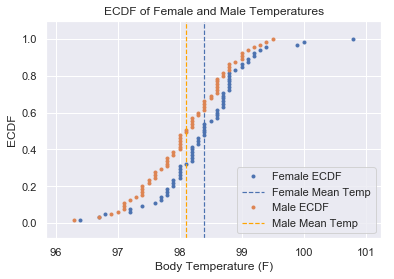

In [19]:
# Plot ECDFs 

# Store temperatures by gender
female_temps = df.temperature[df.gender == "F"]
male_temps = df.temperature[df.gender == "M"]

x_female, y_female = ecdf(female_temps)
x_male, y_male = ecdf(male_temps)

plt.plot(x_female, y_female, marker='.', linestyle='none');
plt.axvline(female_temps.mean(), linestyle='dashed', linewidth=1.2);
plt.plot(x_male, y_male, marker='.', linestyle='none');
plt.axvline(male_temps.mean(), color='orange', linestyle='dashed', linewidth=1.2);

plt.title('ECDF of Female and Male Temperatures');
plt.xlabel('Body Temperature (F)');
plt.ylabel('ECDF');
plt.legend(['Female ECDF', 'Female Mean Temp', 'Male ECDF', 'Male Mean Temp'], loc='lower right');
plt.margins(0.1);
plt.show()

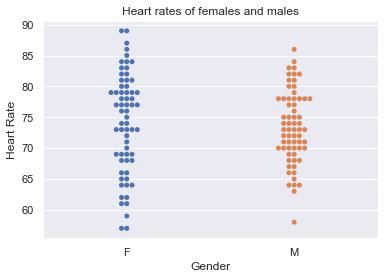

In [20]:
# Plot swarmplot of heart rates for F and M genders
sns.swarmplot(x='gender', y='heart_rate', data=df);
plt.xlabel('Gender');
plt.ylabel('Heart Rate');
plt.title('Heart rates of females and males');
plt.show()

In [21]:
### Two-sample bootstrap hypothesis test for difference of means ###
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # Difference of means of data_1 and data_2
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute the empirical difference of means (our test statistic)
empirical_diff_means = diff_of_means(female_temps, male_temps)

# Compute mean of all temperatures
mean_temp = np.mean(df.temperature)

# Generate shifted arrays to have the same means
# (since we are simulating the hypothesis that their means are equal)
f_temp_shifted = female_temps - np.mean(female_temps) + mean_temp
m_temp_shifted = male_temps - np.mean(male_temps) + mean_temp

# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_f = draw_bs_reps(f_temp_shifted, np.mean, size=10000)
bs_reps_m = draw_bs_reps(m_temp_shifted, np.mean, size=10000)

# # Generate bootstrap replicates from UNSHIFTED arrays
# bs_reps_f = draw_bs_reps(female_temps, np.mean, size=10000)
# bs_reps_m = draw_bs_reps(male_temps, np.mean, size=10000)

# Get replicates of difference of means
bs_temp_replicates = bs_reps_f - bs_reps_m

# Compute p-value
bs_temp_pval = np.sum(bs_temp_replicates >= empirical_diff_means) / len(bs_temp_replicates) * 2

# Compute confidence interval of bootstrap replicates
bs_gender_ci = np.percentile(bs_temp_replicates, [2.5, 97.5])

# Compute margin of error of bootstrap replicates
bs_gender_moe = (bs_gender_ci[1] - bs_gender_ci[0]) / 2

print('Two-sample bootstrap replicate statistics for {0}1 - {1}2:'.format(mu_symbol, mu_symbol))
print('\t95% confidence interval: ({0:.2f}, {1:.2f})'.format(bs_gender_ci[0], bs_gender_ci[1],))
print('\tMargin of error: {0}{1:.4f}{2}'.format(plus_minus_symbol, bs_gender_moe, deg_f_sym))
print('\tP-value: {0:.4%}'.format(bs_temp_pval))

### Frequentist statistical analysis using a z-statistic ###
z_stat_gender, z_pval_gender = ztest(female_temps, male_temps, value=0)

### Manually calculate confidence interval and p-value ###
# Calculate critical z-value
alpha = 0.05
z_star_gender = stats.norm.ppf(1 - alpha/2)

# Calculate SEM
stdv_gender = np.sqrt((np.var(male_temps) / len(male_temps) + np.var(female_temps) / len(female_temps)))

# Calculate MOE
z_moe_gender = abs(z_star_gender * stdv_gender)

# Confidence interval
mean_difference = abs(diff_of_means(female_temps, male_temps))
z_ci_lower_gender = mean_difference - z_moe_gender
z_ci_upper_gender = mean_difference + z_moe_gender

# z-statistic calculation
diff_test = 0
z_stat_calculated = (mean_difference - diff_test) / stdv_gender

# P-value
z_pval_calculated = stats.norm.sf(abs(z_stat_calculated)) * 2    # two-sided p-value

print('\nFrequentist statistics for {0}1-{1}2 using a z-statistic:'.format(mu_symbol, mu_symbol))
print('\tConfidence interval: ({0:.2f}, {1:.2f})'.format(z_ci_lower_gender, z_ci_upper_gender))
print('\tMargin of error: {0}{1:.4f}{2}'.format(plus_minus_symbol, z_moe_gender, deg_f_sym))
print('\tz-statistic: {0:.4f}'.format(z_stat_gender))
print('\tP-value: {0:.4%}'.format(z_pval_gender))

Two-sample bootstrap replicate statistics for μ1 - μ2:
	95% confidence interval: (-0.25, 0.25)
	Margin of error: ±0.2531°F
	P-value: 2.5800%

Frequentist statistics for μ1-μ2 using a z-statistic:
	Confidence interval: (0.04, 0.54)
	Margin of error: ±0.2461°F
	z-statistic: 2.2854
	P-value: 2.2287%


I used a **two-sample bootstrap replicate** hypothesis test and a **z-test** to test if there is a difference between male and female body temperature. According to both tests, there is a 95% chance that the true mean of the distribution is within 0.25 degrees F of the empirical difference of means of female and male body temperatures (0.29 degrees F).
<br><br>The statistical inference tests above suggest we **reject the null hypothesis and support the alternative hypothesis**, that there is a difference between male and female normal body temperature.